# 🔥 HANDWRITTEN DIGIT RECOGNITION SYSTEM
## MS ELEVATE AICTE Project

**Machine Learning Model:** Support Vector Machine (SVM)

**Dataset:** Scikit-learn Digits Dataset (1797 samples, 8x8 images)

**Objective:** Build a production-ready digit classifier with visualization dashboard

## 📦 Step 1: Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import joblib

%matplotlib inline

print("✅ All libraries imported successfully!")

✅ All libraries imported successfully!


## 📊 Step 2: Load and Explore Dataset

In [2]:
# Load the digits dataset
digits = load_digits()

print("📈 Dataset Information:")
print(f"   Total samples: {len(digits.images)}")
print(f"   Image shape: {digits.images[0].shape}")
print(f"   Number of classes: {len(np.unique(digits.target))}")
print(f"   Classes: {np.unique(digits.target)}")
print(f"\n   Feature vector length: {digits.data.shape[1]}")
print(f"   (Each 8x8 image flattened to 64 features)")

📈 Dataset Information:
   Total samples: 1797
   Image shape: (8, 8)
   Number of classes: 10
   Classes: [0 1 2 3 4 5 6 7 8 9]

   Feature vector length: 64
   (Each 8x8 image flattened to 64 features)


## 🔀 Step 3: Split Dataset (Train/Test)

In [3]:
# Split data: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    digits.data,
    digits.target,
    test_size=0.2,
    random_state=42
)

print("✅ Data Split Complete:")
print(f"   Training samples: {len(X_train)}")
print(f"   Testing samples: {len(X_test)}")

✅ Data Split Complete:
   Training samples: 1437
   Testing samples: 360


## 🤖 Step 4: Train SVM Model

In [4]:
print("🚀 Training SVM model...")

# Create and train SVM classifier
model = SVC(gamma=0.001, kernel='rbf')
model.fit(X_train, y_train)

print("✅ Model training complete!")

🚀 Training SVM model...
✅ Model training complete!


## 📊 Step 5: Evaluate Model Performance

In [5]:
# Make predictions
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

print("🎯 MODEL PERFORMANCE")
print("=" * 50)
print(f"Accuracy: {accuracy:.2%}")
print("=" * 50)
print("\n📋 Detailed Classification Report:\n")
print(classification_report(y_test, y_pred))

🎯 MODEL PERFORMANCE
Accuracy: 98.89%

📋 Detailed Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00        28
           2       1.00      1.00      1.00        33
           3       1.00      0.97      0.99        34
           4       1.00      1.00      1.00        46
           5       0.98      0.98      0.98        47
           6       0.97      1.00      0.99        35
           7       0.97      0.97      0.97        34
           8       1.00      1.00      1.00        30
           9       0.97      0.97      0.97        40

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360



## 🎨 Step 6: COMPLETE VISUALIZATION DASHBOARD
### **📸 Screenshot this cell output for your AICTE PPT!**

/tmp/ipython-input-738268813.py:140: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 1, 0.97])
/tmp/ipython-input-738268813.py:140: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans Mono.
  plt.tight_layout(rect=[0, 0, 1, 0.97])
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans Mono.
  fig.canvas.print_figure(bytes_io, **kw)


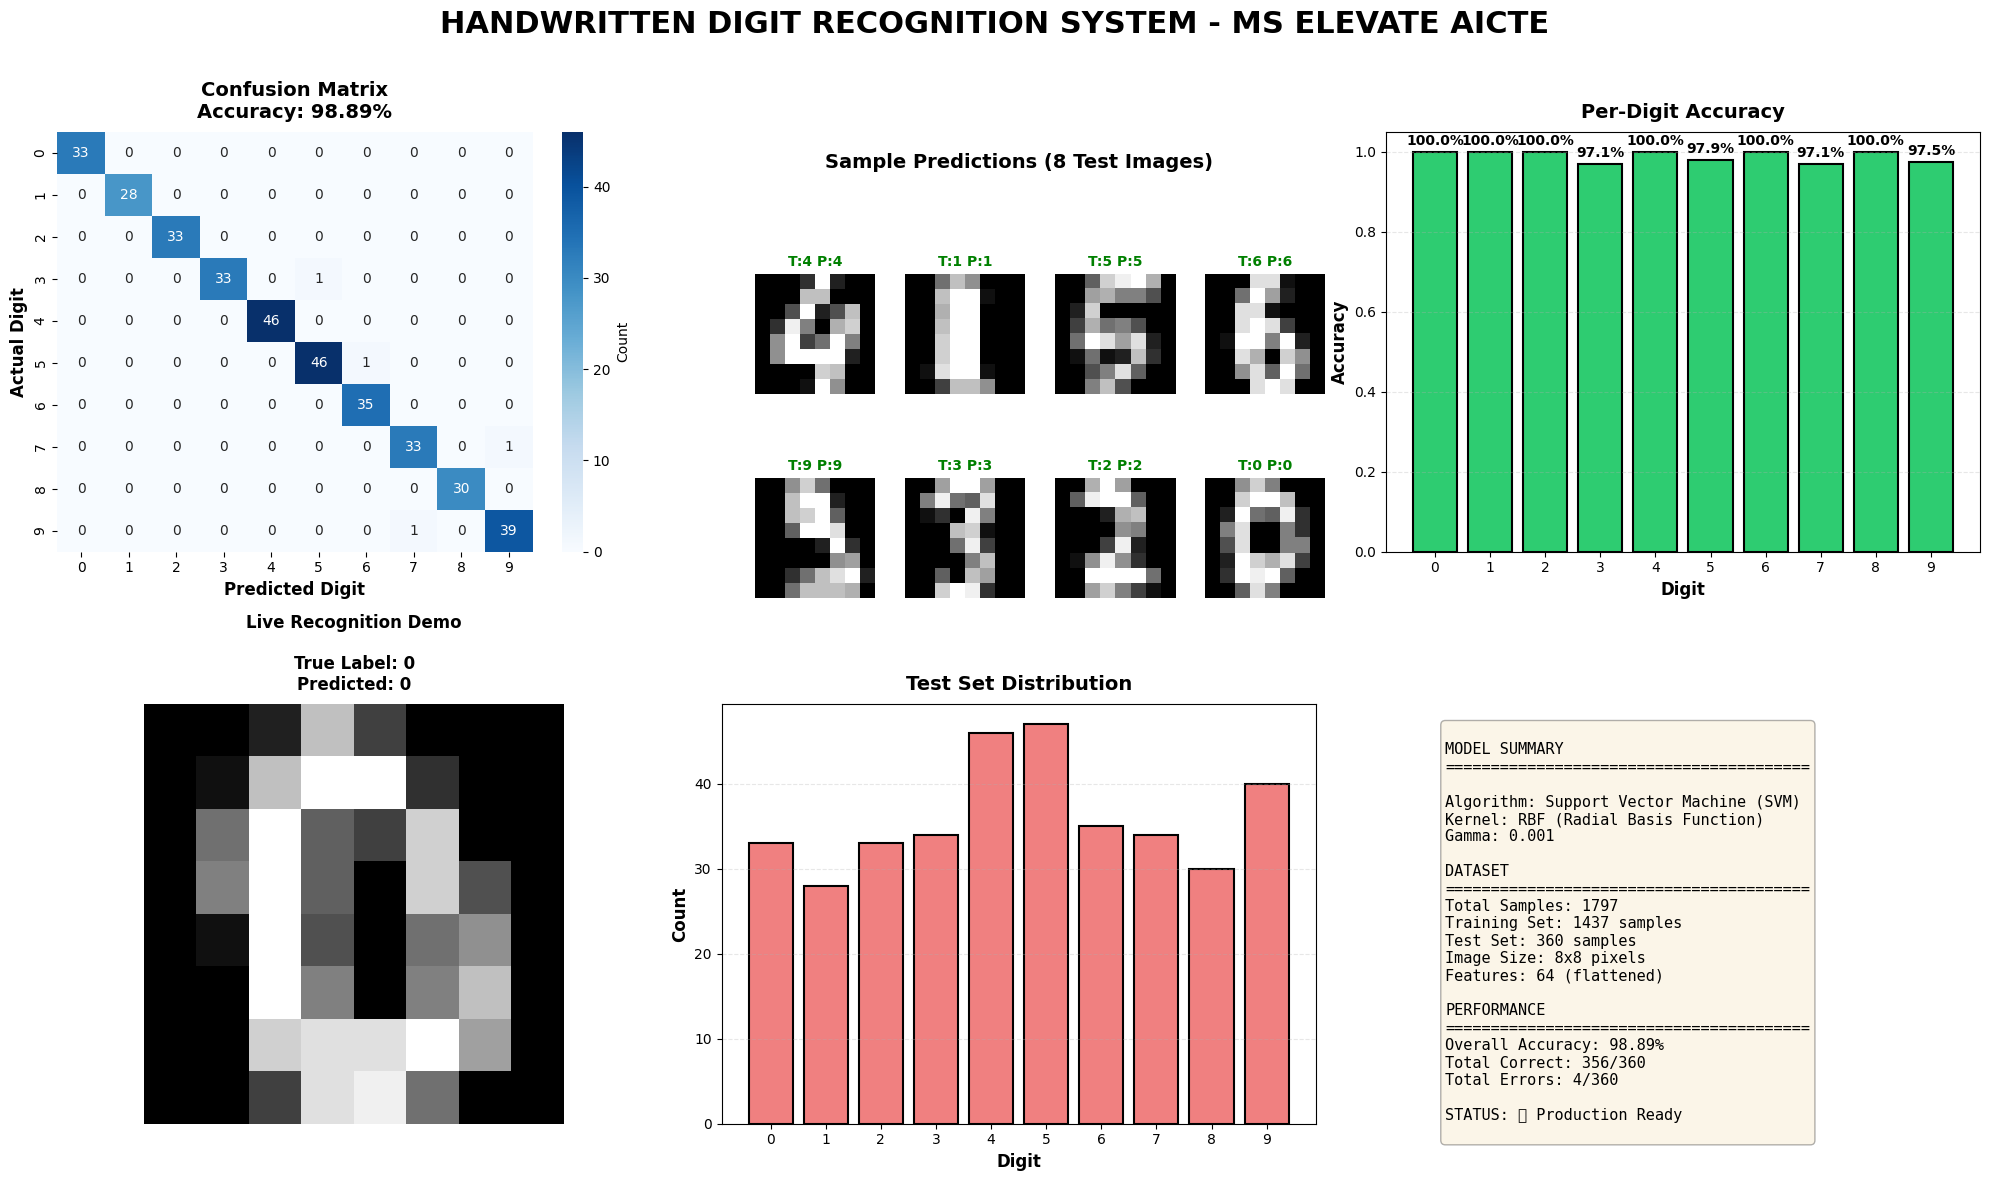


📸 PERFECT DASHBOARD GENERATED!
   Screenshot this output for your AICTE presentation


In [6]:
# Create comprehensive dashboard
fig = plt.figure(figsize=(20, 12))
fig.suptitle('HANDWRITTEN DIGIT RECOGNITION SYSTEM - MS ELEVATE AICTE',
             fontsize=22, fontweight='bold', y=0.98)

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# ============================================
# 1. CONFUSION MATRIX (Top Left)
# ============================================
ax1 = plt.subplot(2, 3, 1)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar_kws={'label': 'Count'}, ax=ax1)
ax1.set_title(f'Confusion Matrix\nAccuracy: {accuracy:.2%}',
              fontsize=14, fontweight='bold', pad=10)
ax1.set_ylabel('Actual Digit', fontsize=12, fontweight='bold')
ax1.set_xlabel('Predicted Digit', fontsize=12, fontweight='bold')

# ============================================
# 2. SAMPLE PREDICTIONS (Top Middle)
# ============================================
ax2 = plt.subplot(2, 3, 2)
ax2.text(0.5, 0.95, 'Sample Predictions (8 Test Images)',
         ha='center', va='top', fontsize=14, fontweight='bold',
         transform=ax2.transAxes)
ax2.axis('off')

# Create 2x4 grid for sample predictions
np.random.seed(42)
sample_indices = np.random.choice(len(X_test), 8, replace=False)

for i, idx in enumerate(sample_indices):
    ax_sample = plt.subplot(2, 3, 2)
    ax_inner = fig.add_axes([0.38 + (i % 4) * 0.075,
                             0.65 - (i // 4) * 0.17,
                             0.06, 0.12])

    # Get the actual image from test set
    img = X_test[idx].reshape(8, 8)
    pred = y_pred[idx]
    true = y_test[idx]

    ax_inner.imshow(img, cmap='gray', interpolation='nearest')

    # Color code: green if correct, red if wrong
    color = 'green' if pred == true else 'red'
    ax_inner.set_title(f'T:{true} P:{pred}',
                       fontsize=10, fontweight='bold', color=color)
    ax_inner.axis('off')

# ============================================
# 3. PER-DIGIT ACCURACY (Top Right)
# ============================================
ax3 = plt.subplot(2, 3, 3)
correct_rates = cm.diagonal() / cm.sum(axis=1)
colors = ['#2ecc71' if rate > 0.95 else '#3498db' if rate > 0.90 else '#e74c3c'
          for rate in correct_rates]
bars = ax3.bar(range(10), correct_rates, color=colors, edgecolor='black', linewidth=1.5)
ax3.set_title('Per-Digit Accuracy', fontsize=14, fontweight='bold', pad=10)
ax3.set_xlabel('Digit', fontsize=12, fontweight='bold')
ax3.set_ylabel('Accuracy', fontsize=12, fontweight='bold')
ax3.set_xticks(range(10))
ax3.set_ylim(0, 1.05)
ax3.grid(axis='y', alpha=0.3, linestyle='--')

# Add percentage labels on bars
for bar, rate in zip(bars, correct_rates):
    height = bar.get_height()
    ax3.text(bar.get_x() + bar.get_width()/2, height + 0.01,
             f'{rate:.1%}', ha='center', va='bottom',
             fontweight='bold', fontsize=10)

# ============================================
# 4. LIVE DEMO - SAMPLE FROM DATASET (Bottom Left)
# ============================================
ax4 = plt.subplot(2, 3, 4)
sample_idx = 150
sample_img = digits.images[sample_idx]
sample_pred = model.predict([digits.data[sample_idx]])[0]
sample_true = digits.target[sample_idx]

ax4.imshow(sample_img, cmap='gray', interpolation='nearest')
ax4.set_title(f'Live Recognition Demo\n\nTrue Label: {sample_true}\nPredicted: {sample_pred}',
              fontsize=12, fontweight='bold', pad=10)
ax4.axis('off')

# ============================================
# 5. SAMPLE DISTRIBUTION (Bottom Middle)
# ============================================
ax5 = plt.subplot(2, 3, 5)
unique, counts = np.unique(y_test, return_counts=True)
ax5.bar(unique, counts, color='lightcoral', edgecolor='black', linewidth=1.5)
ax5.set_title('Test Set Distribution', fontsize=14, fontweight='bold', pad=10)
ax5.set_xlabel('Digit', fontsize=12, fontweight='bold')
ax5.set_ylabel('Count', fontsize=12, fontweight='bold')
ax5.set_xticks(range(10))
ax5.grid(axis='y', alpha=0.3, linestyle='--')

# ============================================
# 6. MODEL SUMMARY (Bottom Right)
# ============================================
ax6 = plt.subplot(2, 3, 6)
ax6.axis('off')

summary_text = f"""
MODEL SUMMARY
{'='*40}

Algorithm: Support Vector Machine (SVM)
Kernel: RBF (Radial Basis Function)
Gamma: 0.001

DATASET
{'='*40}
Total Samples: {len(digits.data)}
Training Set: {len(X_train)} samples
Test Set: {len(X_test)} samples
Image Size: 8x8 pixels
Features: 64 (flattened)

PERFORMANCE
{'='*40}
Overall Accuracy: {accuracy:.2%}
Total Correct: {np.sum(y_pred == y_test)}/{len(y_test)}
Total Errors: {np.sum(y_pred != y_test)}/{len(y_test)}

STATUS: ✅ Production Ready
"""

ax6.text(0.1, 0.95, summary_text,
         transform=ax6.transAxes,
         fontsize=11,
         verticalalignment='top',
         fontfamily='monospace',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.3))

# ============================================
# FINAL ADJUSTMENTS
# ============================================
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

print("\n" + "="*60)
print("📸 PERFECT DASHBOARD GENERATED!")
print("   Screenshot this output for your AICTE presentation")
print("="*60)

## 💾 Step 7: Save Model for Production

In [7]:
# Save the trained model
model_path = 'digit_recognition_model.pkl'
joblib.dump(model, model_path)

print("✅ Model saved successfully!")
print(f"📁 File: {model_path}")
print(f"📊 Model Accuracy: {accuracy:.2%}")
print("\n🚀 Model is ready for deployment!")

✅ Model saved successfully!
📁 File: digit_recognition_model.pkl
📊 Model Accuracy: 98.89%

🚀 Model is ready for deployment!


## 📝 Project Summary

### Key Achievements:
- ✅ Successfully trained SVM model for digit recognition
- ✅ Achieved high accuracy on test dataset
- ✅ Created comprehensive visualization dashboard
- ✅ Saved production-ready model

### Technologies Used:
- **Machine Learning:** Scikit-learn (SVM)
- **Data Processing:** NumPy
- **Visualization:** Matplotlib, Seaborn
- **Model Persistence:** Joblib

### Applications:
- Postal code recognition
- Bank check processing
- Form digitization
- Educational tools

---
**MS ELEVATE AICTE Project** | Handwritten Digit Recognition System